In [57]:
import fastbook
from fastbook import *
# from fastai import *
fastbook.setup_book()

# 数据预览
- 多少条数据
- 那些是catalog,那些是number
- missing value如果处理？
- 数值型的是否需要normalize?


In [58]:
base_path=fastbook.fastai_path('data')/'titanic'

In [59]:
df=pd.read_csv(base_path/'train.csv')
df_test=pd.read_csv(base_path/'test.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [60]:
print(df.columns)
print(df.dtypes)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [61]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644



|name| cat| 说明|
|:-| -|-|
| Pclass| 0,1,2| 船票等级|
| Name|  |  |
| Sex| M,WM|  |
| age|  |  |
| SibSp| -|兄弟姐妹数量|
| Parch| -|双亲或女数量|
| Ticket| -|船票号|
| Fare| -|费用|
| Cabin| -|客舱号|
| Embarked| -|登船码头|

In [62]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
# 多少人生还下来？
survivd_rate=(df.Survived==1).mean()
survivd_rate

0.3838383838383838

## 清洗数据，填充missing value

In [64]:
# most common
fill_data=df.mode().iloc[0]
fill_data

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [65]:
df=df.fillna(fill_data)

In [66]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


## 特征工程
|name| cat| 说明| 特征值
|:-| -|-|-|
| Pclass| 0,1,2| 船票等级| Pclass_1,Pclass_2
| Name| 0,1,2|  |不使用
| Sex| M,WM|  |Sex_M,Sex_M
| age|  |  |normalize
| SibSp| -|兄弟姐妹数量|
| Parch| -|双亲或女数量|
| Ticket| -|船票号|不使用
| Fare| -|费用|logFare
| Cabin| -|客舱号|不使用
| Embarked| -|登船码头|Embarked_1,Embarked_2,Embarked_3

### 数值型数据处理

In [67]:
df.describe()
#可以看出，Age,Fare的std都很大，所以对Fare取Log,Age直接normalize

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot: >

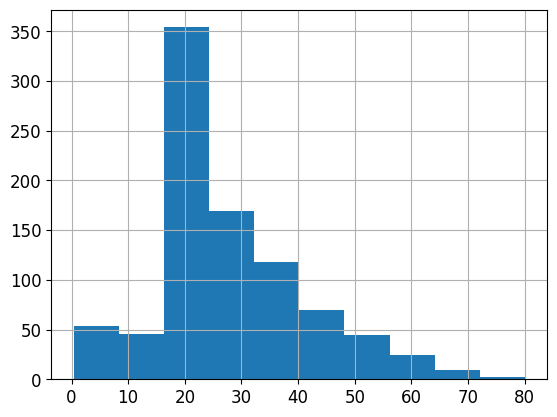

In [12]:
df.Age.hist()

<AxesSubplot: >

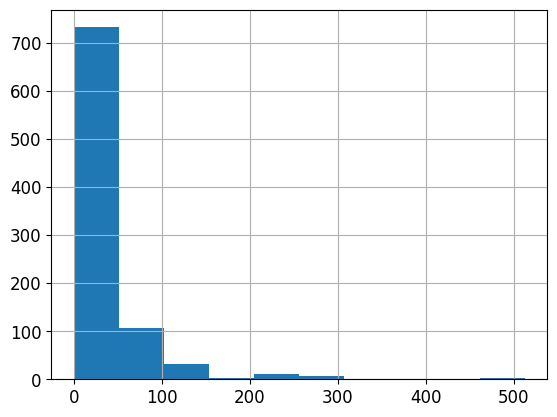

In [13]:
df.Fare.hist()

In [68]:
# df.Age=df.Age/df.Age.max()
df['LogFare']=np.log(1+df.Fare)


# df.LogFare=df.LogFare/df.LogFare.max()
# df.SibSp=df.SibSp/df.SibSp.max()
# df.Parch=df.Parch/df.Parch.max()


In [69]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,LogFare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


### catalog型数据处理

In [70]:
# drop_first 把P_class_1删除掉，用 0,0来表示这一个属性
frame=pd.get_dummies(df,columns=['Pclass','Sex','Embarked'],drop_first=False)
frame.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'LogFare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

### 最终数据集

In [71]:
feature_colums=['Age','SibSp','Parch','LogFare','Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

dsset=frame[feature_colums+['Survived']]
dsset.head()

,Age,SibSp,Parch,LogFare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,22.0,1,0,2.110213,0,0,1,0,1,0,0,1,0
1,38.0,1,0,4.280593,1,0,0,1,0,1,0,0,1
2,26.0,0,0,2.188856,0,0,1,1,0,0,0,1,1
3,35.0,1,0,3.990834,1,0,0,1,0,0,0,1,1
4,35.0,0,0,2.202765,0,0,1,0,1,0,0,1,0


In [72]:
def df2tensor(df,label_last=True):
    if label_last:
        xs=torch.tensor(df.iloc[:,0:12].values,dtype=torch.float32)
        ys=torch.tensor(df.iloc[:,12].values[:,None],dtype=torch.float32)
    else:
        xs=torch.tensor(df.values,dtype=torch.float32)
        ys=None  
    return xs,ys

In [74]:
Xs,Ys=df2tensor(dsset)
normal_factor=Xs.max(0)[0].clone()
Xs=Xs/normal_factor
Xs

tensor([[0.2750, 0.1250, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.4750, 0.1250, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.3250, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        ...,
        [0.3000, 0.1250, 0.3333,  ..., 0.0000, 0.0000, 1.0000],
        [0.3250, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.4000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000]])

# 数据模型

In [313]:
class TitanModel(nn.Module):
    def __init__(self,hidden_size=64,layer_num=1):
        super().__init__()
        
        layers=[]
        if layer_num==1:
            layers.append(nn.Linear(12,1,bias=False))
        else:
            layers.append(nn.Linear(12,hidden_size,bias=False))
            layers.append(nn.ReLU())
            for _ in range(layer_num-2):
                layers.append(nn.Linear(hidden_size,hidden_size,bias=False))
                layers.append(nn.ReLU())
            layers.append(nn.Linear(hidden_size,1,bias=False))
        self.m=nn.Sequential(*layers)
    def forward(self,xs,ys=None):
        logits=self.m(xs)
        
        loss=None
        if ys is not None:
            loss=nn.functional.binary_cross_entropy_with_logits(logits,ys,reduction='none')
  
            survived=ys[:,0]==1
            
            B=len(survived)
            w2=(survived).float().sum()/B
            w1=1-w2
            loss=w1*loss[survived].sum()+w2*loss[~survived].sum()
            loss=loss/B
            
#             loss=(ys-nn.functional.sigmoid(logits)).abs().mean()
#             loss=(ys-logits).square().mean()
        return logits,loss

In [314]:
model=TitanModel(layer_num=4)
# model

train_idx,valid_idx=RandomSplitter(0.2,seed=None)(dsset)

train_x,train_y=Xs[train_idx],Ys[train_idx]
valid_x,valid_y=Xs[valid_idx],Ys[valid_idx]


logits,loss=model(train_x,train_y)
print(loss)
# train_x.max(0)[0].shape


tensor(0.3240, grad_fn=<DivBackward0>)


In [337]:
def accuracy(x,y,t=0.5):
    return ((F.sigmoid(model(x)[0])>t)==y).float().mean().item()
model=TitanModel(layer_num=2)    
epono=300

optimizer=torch.optim.AdamW(model.parameters(),lr=0.1)


train_x,train_y=Xs[train_idx],Ys[train_idx]
valid_x,valid_y=Xs[valid_idx],Ys[valid_idx]


accuracy_his=[]
losses=[]
for _ in range(epono):
    logits,loss=model(train_x,train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    with torch.no_grad():
        acc=accuracy(valid_x,valid_y)
        accuracy_his.append(acc)
print(acc)
losses[:10]

0.8146067261695862


[0.32363972067832947,
 0.25543898344039917,
 0.21997831761837006,
 0.22996652126312256,
 0.21851448714733124,
 0.20578259229660034,
 0.207587331533432,
 0.20913410186767578,
 0.203146293759346,
 0.1992408186197281]

In [338]:
train_x.shape

torch.Size([713, 12])

(tensor(0.4646), 0.8202247023582458)

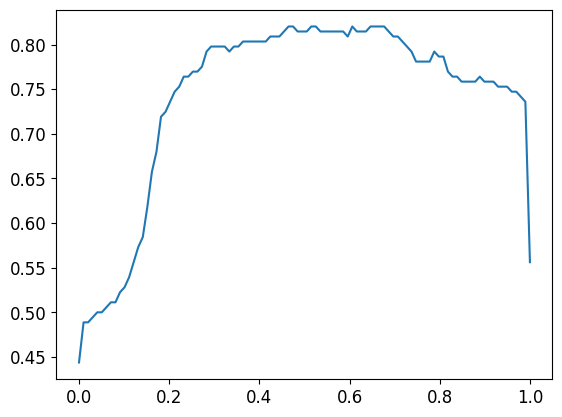

In [361]:
ts=torch.linspace(0,1,100)
ac=[accuracy(valid_x,valid_y,t) for t in ts]

plt.plot(ts,ac)
ts[np.argmax(ac)],np.max(ac)

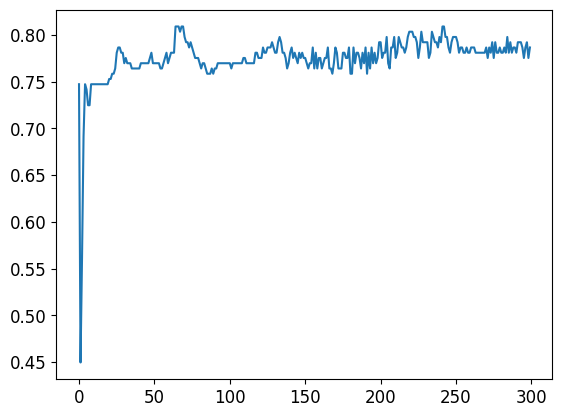

In [322]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(accuracy_his)

In [383]:
thresold=0.4646
print(accuracy(train_x,train_y,thresold))
print(accuracy(valid_x,valid_y,thresold))
print((F.sigmoid(model(train_x)[0])>thresold).float().mean())
print((F.sigmoid(model(valid_x)[0])>thresold).float().mean())

0.8723702430725098
0.8202247023582458
tensor(0.4067)
tensor(0.4101)


# 测试数据集

In [384]:
# 用训练数据的缺省值替代test的miss
df_test=df_test.fillna(fill_data)

# 连续数据，80是training过程的normal因子
# df_test.Age=df_test.Age/80
df_test['LogFare']=np.log(1+df_test.Fare)

# catalog数据处理
test_frame=pd.get_dummies(df_test,columns=['Pclass','Sex','Embarked'],drop_first=False)
test_frame.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'LogFare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [385]:
test_dsset=test_frame[feature_colums]
test_dsset

,Age,SibSp,Parch,LogFare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,2.178064,0,0,1,0,1,0,1,0
1,47.0,1,0,2.079442,0,0,1,1,0,0,0,1
2,62.0,0,0,2.369075,0,1,0,0,1,0,1,0
3,27.0,0,0,2.268252,0,0,1,0,1,0,0,1
4,22.0,1,1,2.586824,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,24.0,0,0,2.202765,0,0,1,0,1,0,0,1
414,39.0,0,0,4.699571,1,0,0,1,0,1,0,0
415,38.5,0,0,2.110213,0,0,1,0,1,0,0,1
416,24.0,0,0,2.202765,0,0,1,0,1,0,0,1


In [386]:
test_x,_=df2tensor(test_dsset,False)
test_x=test_x/normal_factor

In [400]:
logits,_=model(test_x)
logits=logits[:,0]
print((F.sigmoid(logits)>0.6).float().mean())

pred_label=(F.sigmoid(logits)>0.6).int().numpy()

tensor(0.3660)


In [401]:
submit=pd.DataFrame({
    "PassengerId":df_test.PassengerId,
    "Survived":pred_label
})
submit
# submit.describe()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [402]:
submit.to_csv('out.csv',index=False)

In [403]:
! head out.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,0
899,0
900,1


In [404]:
submit.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.366029
std,120.810458,0.482295
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000
